In [1]:
#Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
from wordcloud import WordCloud
import os
import conda
conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib
from mpl_toolkits.basemap import Basemap

#Setting display rows to Max

pd.set_option('display.max_rows', None)

In [2]:
#Reading CSV file for user data
df_user = pd.read_csv('df_user.csv',low_memory=False)

In [3]:
df_user.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,2007-07-06 03:27:11,628,225,227,NaN,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",14,...,2,1,0,1,11,15,22,22,10,0
1,FOBRPlBHa3WPHFB5qYDlVg,Michelle,564,2008-04-28 01:29:25,790,316,400,"2008,2009,2010,2011,2012,2013","ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...",27,...,4,5,2,1,33,37,63,63,21,5
2,zZUnPeh2hEp0WydbAZEOOg,Martin,60,2008-08-28 23:40:05,151,125,103,2010,"Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...",5,...,6,0,1,0,3,7,17,17,4,1
3,QaELAmRcDc5TfJEylaaP8g,John,206,2008-09-20 00:08:14,233,160,84,2009,"iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...",6,...,1,0,0,0,7,14,7,7,2,0
4,xvu8G900tezTzbbfqmTKvA,Anne,485,2008-08-09 00:30:27,1265,400,512,"2009,2010,2011,2012,2014,2015,2016,2017,2018","3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...",78,...,9,2,1,1,22,28,31,31,19,31


In [4]:
#Total no of users
len(df_user)

1968703

In [5]:
#Identifying if all users are unique
df_user['user_id'].nunique()

1968703

In [6]:
#All users are unique

In [7]:
#Sorting the table by review count in the descending order by users
df_user=df_user.sort_values(by='review_count', axis=0, ascending=False)

In [8]:
df_user.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
416,8k3aO-mPeyhbR5HUucA5aA,Victor,14455,2007-12-08 14:56:45,101960,62685,79646,"2008,2009,2010,2011,2012,2013,2014,2015,2016,2...","G2S8uIPRkyFNSs5os0hybA, y5HZivYR6HDOBwSDlddx6A...",1271,...,246,210,55,84,2009,3552,3304,3304,2636,63
14169,RtGqdDBvvBCjcu5dUqwfzA,Shila,12772,2010-10-17 06:35:06,10508,3568,3126,"2012,2013,2014,2015,2016,2017,2018","hz79Mq7EGhHXZkIspAQtrg, HuBgs7uHyUz7DzcaScZqjg...",285,...,20,3,7,7,135,174,166,166,96,9
635,hWDybu_KvYLSdEFzGrniTw,Bruce,12487,2009-03-08 21:47:44,108027,68719,90202,"2010,2011,2012,2013,2014,2015,2016,2017,2018","OK-GE2QwR_D3qi5jrX8RsA, gjhzKWsqCIrpEd9pevbKZw...",659,...,500,413,23,71,1450,3315,3605,3605,2857,1418
830,Hi10sGSZNxQH3NLyWSZ1oA,Fox,11112,2009-05-26 11:33:58,145838,135459,139117,"2014,2015,2016,2017,2018","ikdLkEDRE1vV5oQVPC2f2Q, YUxH_F9jMGAe7PIe8DO34Q...",2718,...,402,383,125,44,2226,5961,6981,6981,1538,3440
200912,P5bUL3Engv-2z6kKohB6qQ,Kim,9875,2006-05-31 21:27:42,26750,10315,20666,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2...","-8-PZkekFPrK4E0Ge9urxg, fvhzz6aq0aC93LhyWEm2mg...",774,...,127,105,47,34,501,1061,1169,1169,471,223


In [9]:
#Extracting year from yelping since
df_user['year'] = pd.DatetimeIndex(df_user['yelping_since']).year
df_user.tail()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,year
1415658,7RM6w3OHu95ifgXXfl5aLw,Emma,0,2012-11-18 18:13:36,1,0,0,NaN,o6AiGFiMffZIm-hGW5qw7g,0,...,0,0,0,0,0,0,0,0,0,2012
1530768,-d8nnc-pp6qj_6qnp4IN-g,Luke,0,2011-11-08 20:37:33,0,0,0,NaN,None,0,...,0,0,0,0,0,0,0,0,0,2011
125809,AbbeFj9SPxOoHNKkeDVn6w,Janet,0,2017-07-11 06:37:38,0,2,0,NaN,"fwwZK_bVBK-0ovQU8XCKBQ, etlj3-oBXWZDXFaF-684NA...",0,...,0,0,0,0,0,0,0,0,0,2017
1474346,SoFv1NZbpnZdL051sVVXBA,Susanna,0,2017-09-16 21:26:12,0,0,0,NaN,"588RSIeWljDTtZRcaGvB2w, vI2BFlKdFOpusSG4S0oEWg...",0,...,0,0,0,0,0,0,0,0,0,2017
830420,0EoFWrwXLcY0HVmTqa13Bw,Amanda,0,2015-07-07 16:20:25,2,0,0,NaN,"Vk7MRc1eBC9rWLYudTeueg, nO7l2G_dhnHmWeNHT-x0iA...",0,...,0,0,0,0,0,0,0,0,0,2015


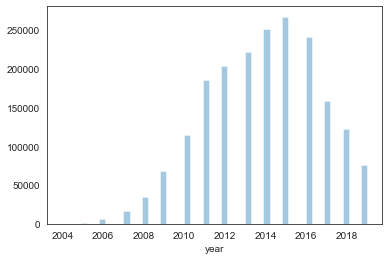

In [10]:
#Creating histogram for seeing distribution for users yearwise
sns.distplot(df_user['year'],kde=False)

In [11]:
#New Users are increasing from 2004 to 2014 then decreasing 

In [12]:
#Lets check % growth y-o-y
df_years=df_user.groupby('year').agg({'review_count': 'sum','user_id':'count'})
df_years

,review_count,user_id
year,,
2004,12455,82
2005,245110,1022
2006,1015557,6052
2007,2217753,17155
2008,3419994,34327
2009,4539844,68314
2010,5518655,115106
2011,6174151,185076
2012,5056751,203180


In [13]:
df_years['% Growth in reviews'] = df_years['review_count'].pct_change()
df_years['% Growth in users'] = df_years['user_id'].pct_change()

In [14]:
df_years.fillna(0)

,review_count,user_id,% Growth in reviews,% Growth in users
year,,,,
2004,12455,82,0.000000,0.000000
2005,245110,1022,18.679647,11.463415
2006,1015557,6052,3.143270,4.921722
2007,2217753,17155,1.183780,1.834600
2008,3419994,34327,0.542099,1.000991
2009,4539844,68314,0.327442,0.990095
2010,5518655,115106,0.215605,0.684955
2011,6174151,185076,0.118778,0.607874
2012,5056751,203180,-0.180980,0.097819


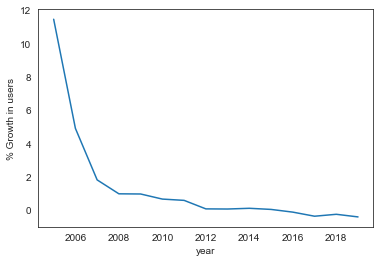

In [15]:
#Growth in users
sns.lineplot(x=df_years.index,y=df_years['% Growth in users'])

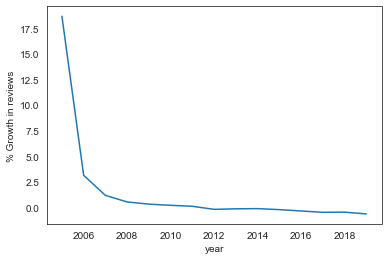

In [16]:
#Growth in reviews
sns.lineplot(x=df_years.index,y=df_years['% Growth in reviews'])